# Capstone Jupyter Notebook 6 - Other Observations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### How do song metrics relate to each other?

In [3]:
songs = pd.read_csv('Spotify_Youtube_Unique.csv', index_col='ID')

In [4]:
songs.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Stream', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'Official_video'],
      dtype='object')

In [6]:
songs.drop(list(songs.columns[-10:]), axis=1, inplace=True)
songs.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms'],
      dtype='object')

In [7]:
songs.corr()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_21892\2131039685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
Danceability,1.000000,0.224246,0.032084,0.335028,0.209915,-0.267154,-0.303428,-0.081194,0.464662,-0.074678,-0.117048
Energy,0.224246,1.000000,0.029288,0.742806,0.062630,-0.660321,-0.294364,0.170766,0.383240,0.161565,0.020799
Key,0.032084,0.029288,1.000000,0.022275,0.015790,-0.027285,0.004610,-0.008647,0.036932,-0.003737,-0.005503
Loudness,0.335028,0.742806,0.022275,1.000000,0.025815,-0.544881,-0.528096,0.087583,0.299512,0.146363,0.006259
Speechiness,0.209915,0.062630,0.015790,0.025815,1.000000,-0.072583,-0.105912,0.093577,0.056371,0.028989,-0.074217
Acousticness,-0.267154,-0.660321,-0.027285,-0.544881,-0.072583,1.000000,0.259976,-0.036550,-0.197883,-0.129234,-0.036394
Instrumentalness,-0.303428,-0.294364,0.004610,-0.528096,-0.105912,0.259976,1.000000,-0.062485,-0.258739,-0.073988,-0.002330
Liveness,-0.081194,0.170766,-0.008647,0.087583,0.093577,-0.036550,-0.062485,1.000000,0.036683,0.009557,0.003573
Valence,0.464662,0.383240,0.036932,0.299512,0.056371,-0.197883,-0.258739,0.036683,1.000000,0.091064,-0.069767
Tempo,-0.074678,0.161565,-0.003737,0.146363,0.028989,-0.129234,-0.073988,0.009557,0.091064,1.000000,-0.012248


In [8]:
songs.corr().apply(lambda x: x.sort_values().unique()[0]).sort_values()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_21892\2896059877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr().apply(lambda x: x.sort_values().unique()[0]).sort_values()


Energy             -0.660321
Acousticness       -0.660321
Loudness           -0.544881
Instrumentalness   -0.528096
Danceability       -0.303428
Valence            -0.258739
Tempo              -0.129234
Duration_ms        -0.117048
Speechiness        -0.105912
Liveness           -0.081194
Key                -0.027285
dtype: float64

### `Acousticness` and `Energy` are the most negatively correlated variables.

In [9]:
songs.corr().apply(lambda x: x.sort_values(ascending=False).unique()[1]).sort_values(ascending=False)

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_21892\2239890775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr().apply(lambda x: x.sort_values(ascending=False).unique()[1]).sort_values(ascending=False)


Energy              0.742806
Loudness            0.742806
Danceability        0.464662
Valence             0.464662
Acousticness        0.259976
Instrumentalness    0.259976
Speechiness         0.209915
Liveness            0.170766
Tempo               0.161565
Key                 0.036932
Duration_ms         0.020799
dtype: float64

### `Loudness` and `Energy` are the most positively correlated variables (not counting a variable to itself).

In [10]:
np.abs(songs.corr()).apply(lambda x: x.sort_values().unique()[0]).sort_values()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_21892\1776127275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(songs.corr()).apply(lambda x: x.sort_values().unique()[0]).sort_values()


Instrumentalness    0.002330
Duration_ms         0.002330
Liveness            0.003573
Key                 0.003737
Tempo               0.003737
Loudness            0.006259
Speechiness         0.015790
Energy              0.020799
Acousticness        0.027285
Danceability        0.032084
Valence             0.036683
dtype: float64

### `Instrumentalness` and `Duration_ms` are the least correlated variables.

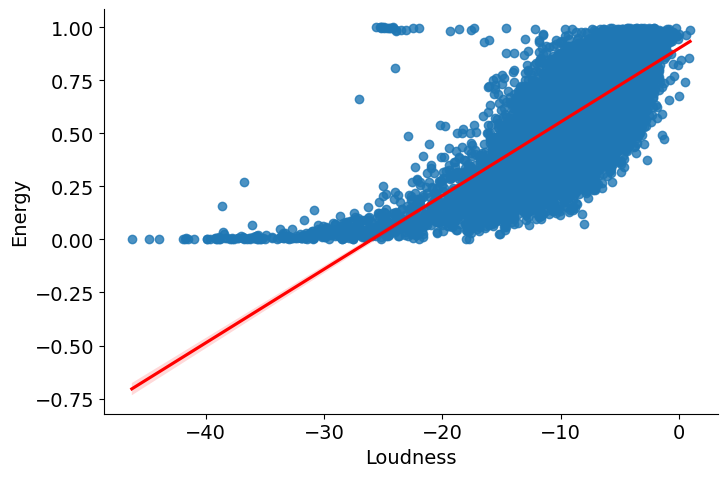

In [11]:
sns.lmplot(data=songs, x='Loudness', y='Energy', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [12]:
X = songs[['Loudness']]
y = songs.Energy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_test_mean = y_test.mean()
print('Average Energy =', round(y_test_mean, 4))

Average Energy = 0.6363


In [13]:
baseline = [y_test_mean] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline))
print('Baseline RMSE =', round(baseline_rmse, 4))

Baseline RMSE = 0.2162


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
preds = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
coefficient = lin_reg.coef_
intercept = lin_reg.intercept_

print(f'Model: Energy = {round(intercept, 4)} + {round(coefficient[0], 4)}*Loudness')
print(f'RMSE = {round(rmse, 4)}, {round(100 * (1 - (rmse / baseline_rmse)), 2)}% better than baseline EMSE')

Model: Energy = 0.9011 + 0.0347*Loudness
RMSE = 0.143, 33.83% better than baseline EMSE


### `Loudness` and `Energy` are indeed positively correlated.

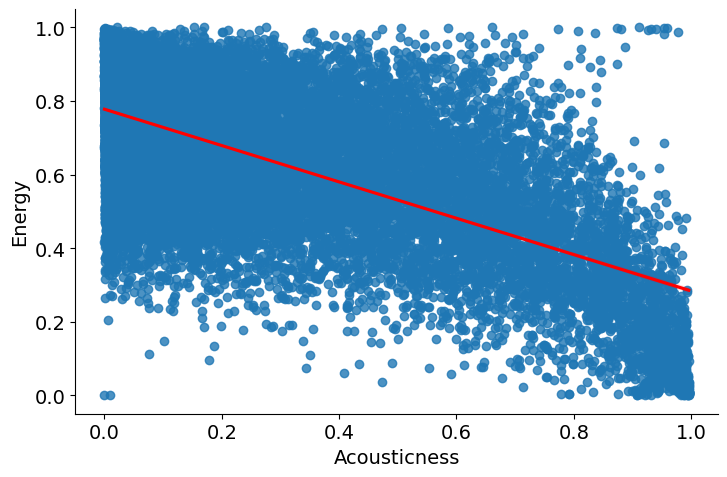

In [18]:
sns.lmplot(data=songs, x='Acousticness', y='Energy', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [16]:
X = songs[['Acousticness']]
y = songs.Energy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_test_mean = y_test.mean()
print('Average Energy =', round(y_test_mean, 4))

Average Energy = 0.6363


In [17]:
baseline = [y_test_mean] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline))
print('Baseline RMSE =', round(baseline_rmse, 4))

Baseline RMSE = 0.2162


In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
preds = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
coefficient = lin_reg.coef_
intercept = lin_reg.intercept_

print(f'Model: Energy = {round(intercept, 4)} + {round(coefficient[0], 4)}*Acousticness')
print(f'RMSE = {round(rmse, 4)}, {round(100 * (1 - (rmse / baseline_rmse)), 2)}% better than baseline EMSE')

Model: Energy = 0.7769 + -0.4923*Acousticness
RMSE = 0.1618, 25.14% better than baseline EMSE


### `Acousticness` and `Energy` are indeed negatively correlated.

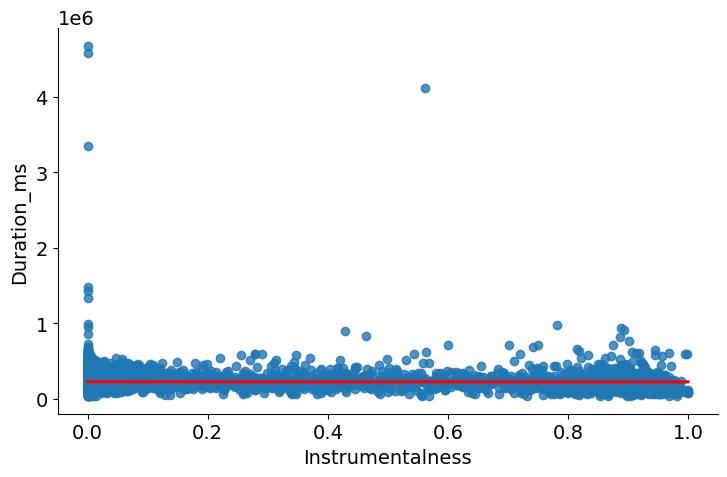

In [32]:
sns.lmplot(data=songs, x='Instrumentalness', y='Duration_ms', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [33]:
X = songs[['Instrumentalness']]
y = songs.Duration_ms
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_test_mean = y_test.mean()
print(f'Average Duration = {round(y_test_mean)} ms')

Average Duration = 220758 ms


In [34]:
baseline = [y_test_mean] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline))
print('Baseline RMSE =', round(baseline_rmse))

Baseline RMSE = 70840


In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
preds = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
coefficient = lin_reg.coef_
intercept = lin_reg.intercept_

print(f'Model: Duration_ms = {round(intercept)} + {round(coefficient[0], 2)}*Instrumentalness')
print(f'RMSE = {round(rmse)}, {round(100 * (1 - (rmse / baseline_rmse)), 3)}% better than baseline EMSE')

Model: Duration_ms = 222849 + 1080.16*Instrumentalness
RMSE = 70877, -0.053% better than baseline EMSE


### `Instrumentalness` and `Duration_ms` are indeed not related. A linear regression line to predict duration is worse than simply guessing the mean.

### Are certain metrics more popular in certain genres?

In [29]:
songs2 = pd.read_csv('Spotify_Youtube_Genre_Unique.csv', index_col='ID')
songs2.columns

Index(['Track', 'Artist', 'Track_id', 'Url_spotify', 'Album', 'Album_type',
       'Uri', 'Genre_spotify', 'Genre', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream', 'Url_youtube',
       'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description',
       'Licensed', 'official_video'],
      dtype='object')

### `Loudness` in general

In [43]:
songs2.describe().Loudness

count    11695.000000
mean        -6.990780
std          3.273337
min        -43.988000
25%         -8.321500
50%         -6.273000
75%         -4.816500
max          0.175000
Name: Loudness, dtype: float64

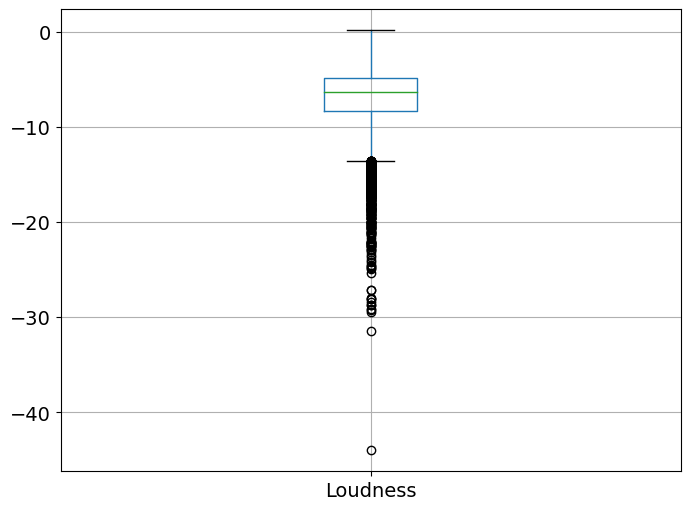

In [44]:
songs2.boxplot(column='Loudness');

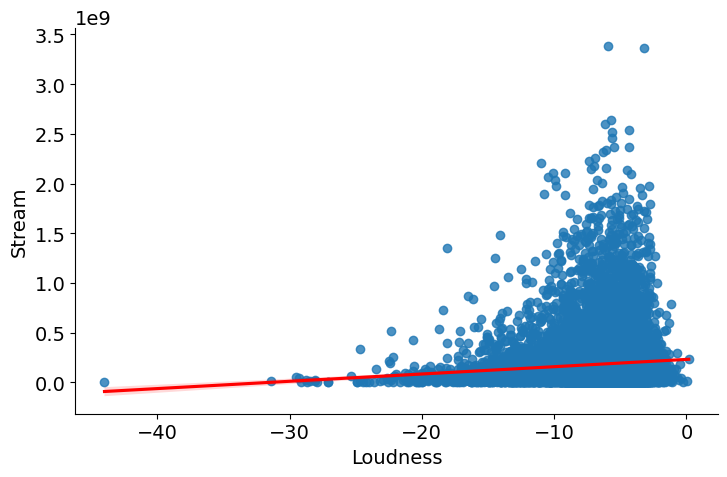

In [31]:
sns.lmplot(data=songs2, x='Loudness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [39]:
genres = np.sort(songs2.Genre.unique())
genres

array(['bolero', 'boy band', 'country', 'dance/electronic', 'else',
       'funk', 'hip hop', 'house', 'indie', 'jazz', 'k-pop', 'latin',
       'metal', 'opm', 'pop', 'r&b/soul', 'rap', 'reggae', 'reggaeton',
       'rock', 'trap'], dtype=object)

### `Loudness` in `metal`

In [84]:
metal = songs2[songs2.Genre == 'metal']
metal.describe().Loudness

count    380.000000
mean      -5.128134
std        1.878791
min      -15.886000
25%       -5.880000
50%       -4.797000
75%       -3.952000
max       -1.278000
Name: Loudness, dtype: float64

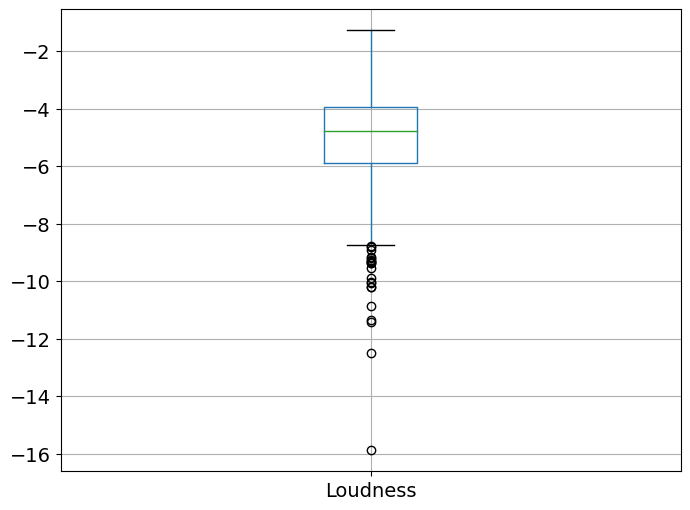

In [46]:
metal.boxplot(column='Loudness');

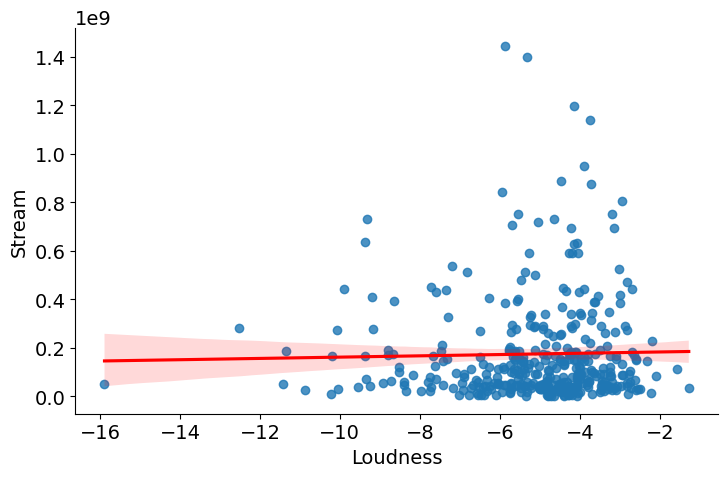

In [47]:
sns.lmplot(data=metal, x='Loudness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

### `Loudness` in `indie`

In [56]:
indie = songs2[songs2.Genre == 'indie']
indie.describe().Loudness

count    482.000000
mean      -7.495268
std        3.570502
min      -27.962000
25%       -8.651250
50%       -6.667500
75%       -5.183000
max       -1.761000
Name: Loudness, dtype: float64

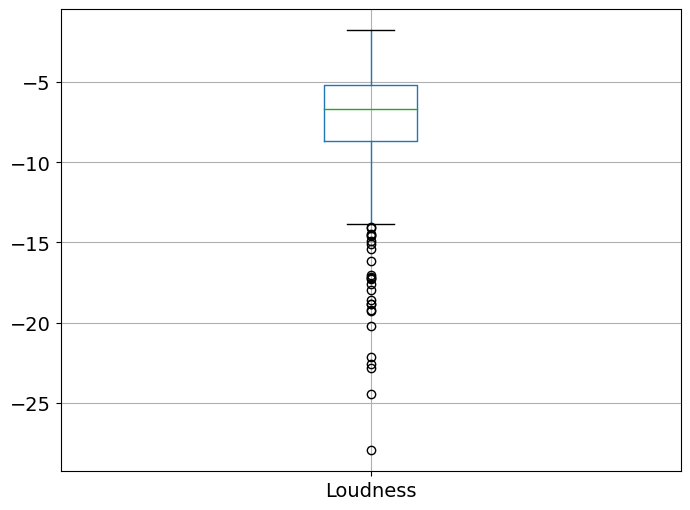

In [57]:
indie.boxplot(column='Loudness');

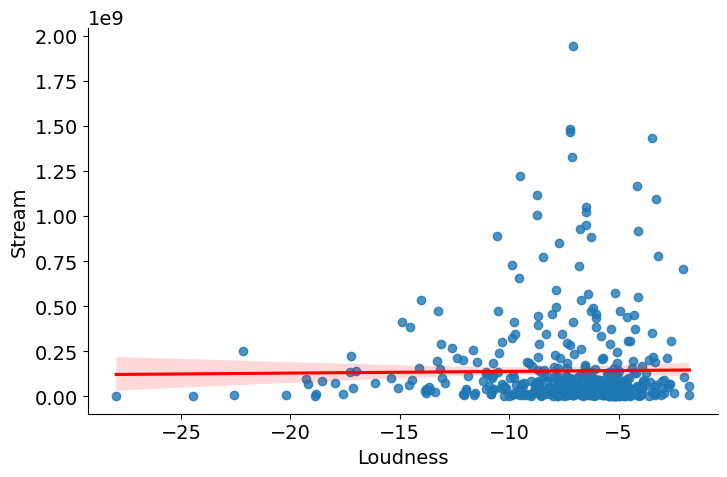

In [58]:
sns.lmplot(data=indie, x='Loudness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

### Overall, `metal` is louder than `indie`.

### `Danceability` in general

In [85]:
songs2.describe().Danceability

count    11695.000000
mean         0.628338
std          0.150560
min          0.000000
25%          0.530000
50%          0.640000
75%          0.739000
max          0.975000
Name: Danceability, dtype: float64

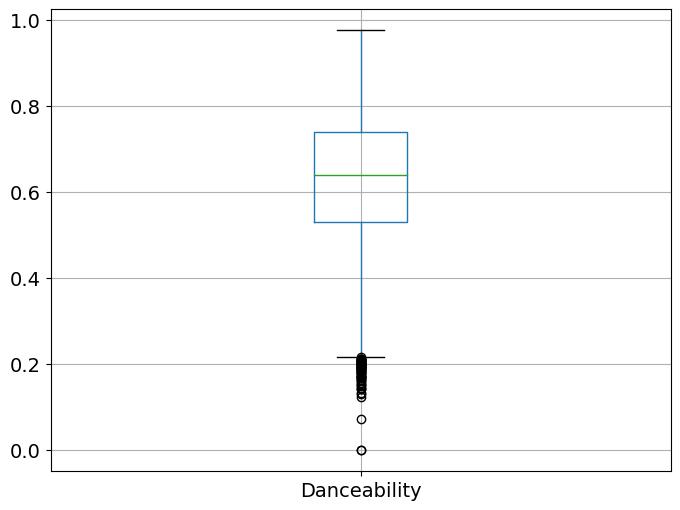

In [62]:
songs2.boxplot(column='Danceability');

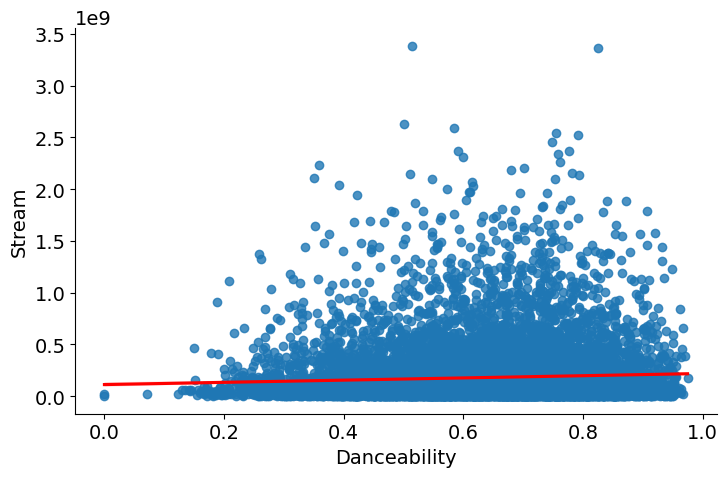

In [63]:
sns.lmplot(data=songs2, x='Danceability', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

### `Danceability` in `metal`

In [69]:
metal.describe().Danceability

count    380.000000
mean       0.472592
std        0.113372
min        0.130000
25%        0.408500
50%        0.476000
75%        0.544250
max        0.767000
Name: Danceability, dtype: float64

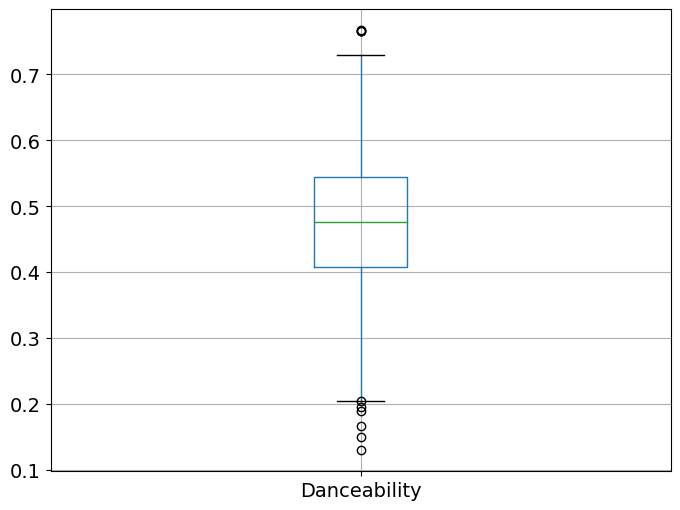

In [64]:
metal.boxplot(column='Danceability');

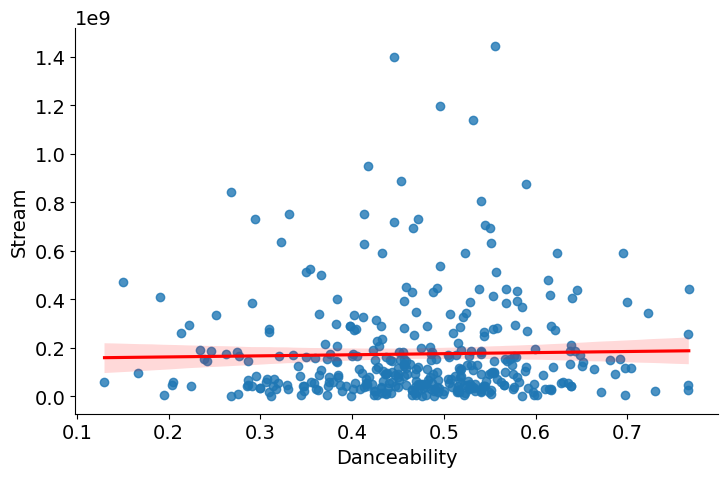

In [65]:
sns.lmplot(data=metal, x='Danceability', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

### `Danceability` in `indie`

In [70]:
indie.describe().Danceability

count    482.000000
mean       0.633595
std        0.147322
min        0.209000
25%        0.539250
50%        0.642000
75%        0.753750
max        0.949000
Name: Danceability, dtype: float64

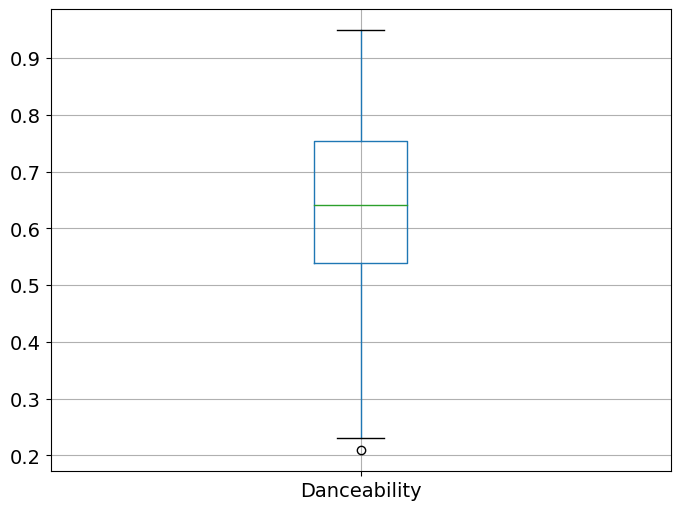

In [66]:
indie.boxplot(column='Danceability');

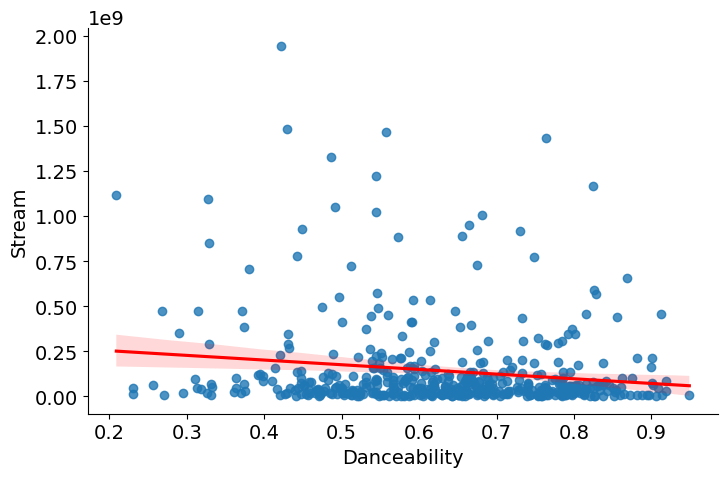

In [67]:
sns.lmplot(data=indie, x='Danceability', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

### `indie` music is more danceable than `metal`. Surprising!

### `Danceability` in `jazz`

In [77]:
jazz = songs2[songs2.Genre == 'jazz']
jazz.describe().Danceability

count    39.000000
mean      0.552923
std       0.135317
min       0.259000
25%       0.458500
50%       0.542000
75%       0.660500
max       0.798000
Name: Danceability, dtype: float64

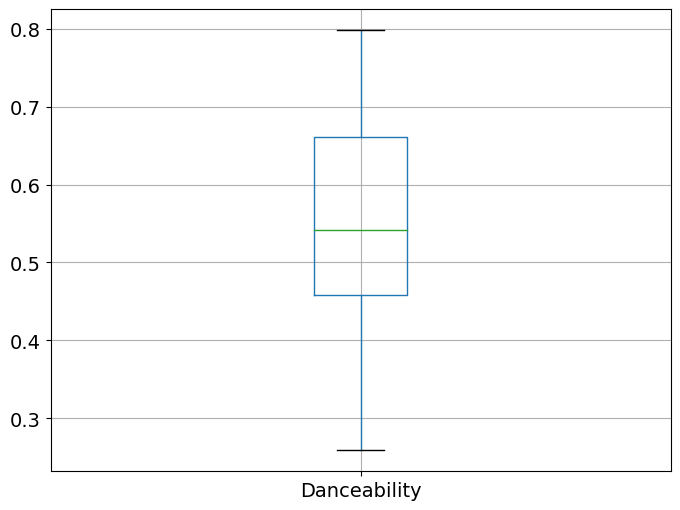

In [78]:
jazz.boxplot(column='Danceability');

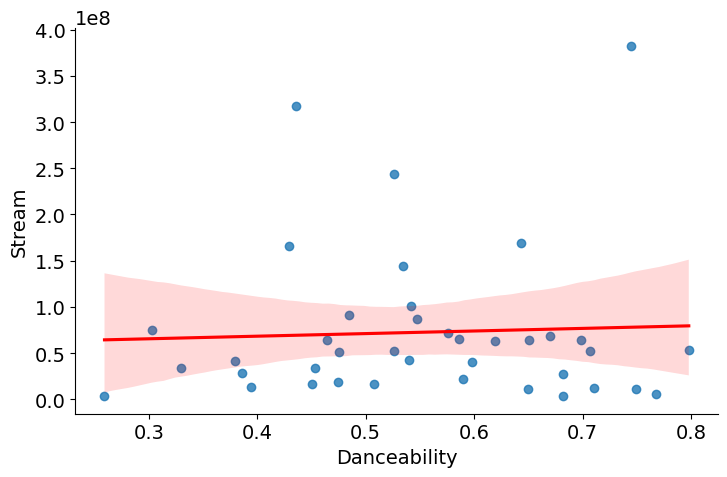

In [79]:
sns.lmplot(data=jazz, x='Danceability', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

### `Danceability` in `dance/electronic`

In [100]:
dance = songs2[songs2.Genre == 'dance/electronic']
dance.describe().Danceability

count    393.000000
mean       0.640468
std        0.145437
min        0.200000
25%        0.549000
50%        0.641000
75%        0.750000
max        0.964000
Name: Danceability, dtype: float64

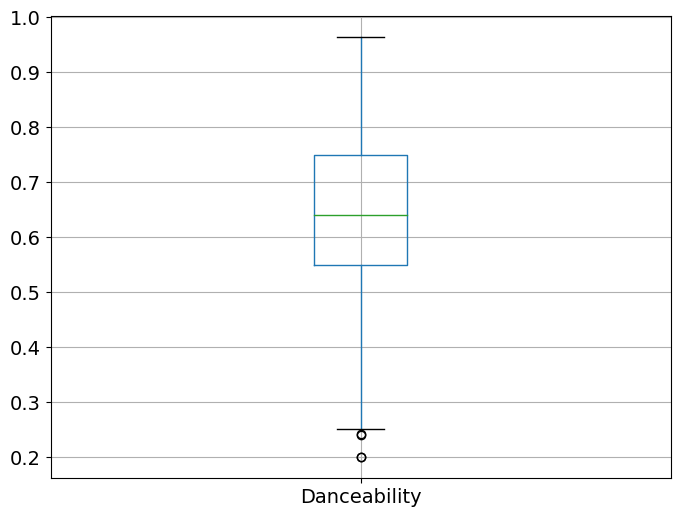

In [82]:
dance.boxplot(column='Danceability');

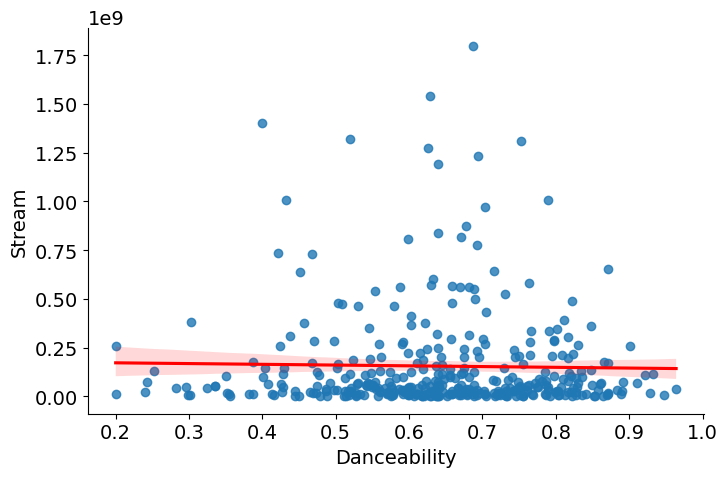

In [83]:
sns.lmplot(data=dance, x='Danceability', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

### Unsurprisingly, `dance/electronic` music is more danceable than `jazz`. But why is the minimum value of `Danceability` <u>0.259</u> for `jazz` but only <u>0.200</u> for `dance/electronic`?